## Trabalho final

O seguinte trabalho tem por objetivo desenvolver uma rede neural capaz de prever a altura de um rio baseado nos valores dos últimos 15 dias anteriores
Para isso utilizou-se Redes Neurais Recorrentes (LSTM) dado sua alta eficácia com séries temporais

## Importação das bibliotecas

In [1]:
import pandas as pd
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Análise exploratória dos dados

In [2]:
def read_archive(path_arquivo):
    lines = [] 
    with open(path_arquivo) as arquivo:
        for line in arquivo:
            lines.append(line.split())
    df = pd.DataFrame(lines, columns= ['DIA', 'MES', 'ANO', 'MEDICAO'])
    return df

def dados(dado):
    ano = dado['ANO']
    mes = dado['MES']
    dia = dado['DIA']
    medidas = {"DATA":[], "MEDICAO":[]}
    for med in range(len(dado['ANO'])):
        if float(dado['MEDICAO'][med]) > 0:
            d = int(dia[med])
            m = int(mes[med])
            medidas['DATA'].append(date(int(ano[med]), m, d))
            medidas['MEDICAO'].append(float(dado['MEDICAO'][med]))
    return medidas

In [3]:
df = read_archive("15700000.txt")

In [4]:
df = pd.DataFrame(dados(df))

In [5]:
def calcula_media_mensal(df):
    medias_mensais = {'data':[], 'media': []}
    for x in range(len(df)):
        ano = df.DATA[x].year
        mes = df.DATA[x].month
        
        somatorio = 0
        qtd_medicoes = 0
        
        for m in range(x, len(df)):
        
            if df.DATA[m].month != mes:
                break
            else:
                somatorio+=df.MEDICAO[m]
                qtd_medicoes+=1
        if date(int(ano), mes, 15) not in medias_mensais['data']:
            
            medias_mensais['data'].append(date(int(ano), mes, 15))
            medias_mensais['media'].append(somatorio/qtd_medicoes)
            
    return medias_mensais

In [6]:
import matplotlib.pyplot as plt

def plot(quem, x,y, titulo, x_description, y_description, color, xticks= False, yticks= False, size= (14,3), name = ''):

    colors = {'Blue': ('#00243c', '#00507D', '#0392BE', '#07ADC7', '#45C7C9', '#45C7C9', '#D6FFFD'), 
              'Green': ('#FFFFFF','#A3DFC3', '#6AB982', '#5E885B','#4A692D','#618700', '#4A692D')}
    if quem.upper() == 'Joao':
        cor = 'Blue'
    else:
        cor = 'Green'
    ax = plt.axes()
    plt.gcf().set_size_inches(size)

    ax.plot(x,y, color = colors[cor][color['line']])
    
    
    ax.set_title(str(titulo), fontdict=None, loc='center', pad=None)    
    ax.set_xlabel(x_description)
    ax.set_ylabel(y_description)
    #ax.set_axis_off()
    
    if name == '':
        fgura = 'figura'
    else:
        fgura = name
    
    plt.savefig(f'{fgura}.png', dpi= 200, bbox_inches='tight', pad_inches=0)
    plt.show()
    
    return None


Os dados foram coletados da estação hidrológica da cidade de Humaitá - AM

Os dados correspondem á valores de cota (altura do rio) na estação hidrológica

Vale ressaltar que os valores se referem a bacia hidrográfica do Rio Madeira

In [10]:
anodf = df[0:365]

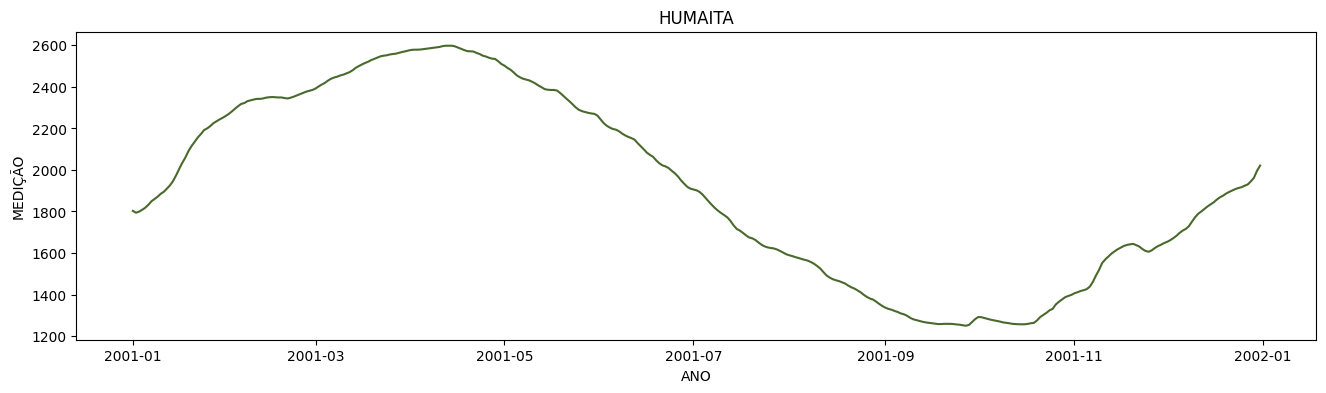

In [11]:
anodf.MEDICAO.max()
medias = pd.DataFrame(calcula_media_mensal(anodf))

plot('FERNANDO', anodf.DATA, anodf.MEDICAO, 'HUMAITA', 'ANO', 'MEDIÇÃO', {'background': 6, 'line': 4, 'y_ticks' : 3}, size= (16,4))